
# 0.0. imports


## 0.1. Helper functions



## 0.2. Loading data



In [1]:
import pandas as pd
import inflection
import numpy as np
from IPython.core.display import HTML
from IPython.display import Image


In [2]:
df_sales_raw = pd.read_csv('/home/jan/ds_producao/ds_prod/data/rossmann-store-sales/train.csv', low_memory=False)
df_store_raw = pd.read_csv('/home/jan/ds_producao/ds_prod/data/rossmann-store-sales/store.csv', low_memory=False)

#merge dos dataframe

data_merge = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

#para que serve o on, no método merge?

# 1.0. DESCRIÇÃO DOS DADOS



In [3]:
df1_copy = data_merge.copy()
data_merge.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1. renomeando as colunas




In [4]:
colunas = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
        'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
        'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase        = lambda x: inflection.underscore(x)
cols_new         = list(map(snakecase, colunas))
df1_copy.columns = cols_new




## 1.2. data dimensions


In [5]:
print(f'Number of rows {df1_copy.shape[0]}')
print(f'Number of cols {df1_copy.shape[1]}')

Number of rows 1017209
Number of cols 18


In [6]:
df1_copy.date = pd.to_datetime(df1_copy.date)
df1_copy.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.3. Check NA




In [7]:
df1_copy.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## **Existem 3 maneira de tratar NA**

####    -> Excluir. Excluir os valores nulos é uma maneira de "trata-lo" contudo, "livrar-se do problema não significa resolve-lo" dados podem prejudicar algum tipo de analise ou predição. Isso se dá porque estamos 'jogando dados fora'.


####    -> Usar algoritimos de ML. A utilização de algoritmos vai estimar o valor que estaria ali naquela posição tomando como base o comportamento dos dados da coluna. 


####    -> E a 3 forma, e que talvez a que eu considere a mais sensata, é entender o porquê aquele dado esta faltando. 



### 1.4. Fillout NA



In [9]:
import math
df1_copy['competition_open_since_year']

0          2008.0
1          2007.0
2          2006.0
3          2009.0
4          2015.0
            ...  
1017204    2014.0
1017205    2006.0
1017206       NaN
1017207       NaN
1017208       NaN
Name: competition_open_since_year, Length: 1017209, dtype: float64

In [10]:
#CompetitionDistance 
df1_copy['competition_distance'] = df1_copy['competition_distance'].apply(lambda x: 200000 if pd.isnull(x) else x)

#CompetitionOpenSinceMonth
df1_copy['competition_open_since_month'] = df1_copy.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)

#CompetitionOpenSinceYear 
df1_copy['competition_open_since_year'] = df1_copy.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)


#Promo2SinceWeek 
df1_copy['promo2_since_week'] = df1_copy.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)

#Promo2SinceYear
df1_copy['promo2_since_year'] = df1_copy.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)






In [11]:
df1_copy.isnull().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance                 0
competition_open_since_month         0
competition_open_since_year          0
promo2                               0
promo2_since_week                    0
promo2_since_year                    0
promo_interval                  508031
dtype: int64

In [12]:
#PromoInterval
month_map = {1: 'Jan', 2: 'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

df1_copy.fillna(0, inplace=True)

df1_copy['month_map']  = df1_copy['date'].dt.month.map(month_map)

df1_copy['is_promo']   = df1_copy[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'] else 0, axis=1)


## Change Types

### 1.6. DESCRIÇÃO DOS DADOS



In [13]:
df1_copy.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [14]:
df1_copy['competition_open_since_month'] = df1_copy['competition_open_since_month'].astype( int )
df1_copy['competition_open_since_year'] = df1_copy['competition_open_since_year'].astype( int )
df1_copy['promo2_since_week'] = df1_copy['promo2_since_week'].astype( int )
df1_copy['promo2_since_year'] = df1_copy['promo2_since_year'].astype( int )

## 1.7. Descriptive Statistical


## Para que serve?

### Serve para basicamente DUAS coisas. 
#### 1st: ganhar conhecimento de negócio.Por meio dessa descrição é que entenderemos as nuances do negócio.
#### 2nd: Detecção de erros.

           #disperção dos dados, o que é?
           #tendendia central. Pra que serve? 
       """dados estatisticos de primeira ordem.""""

    #skill e curtosis. 
    #como é a deformação dos dados em relação ao normal
    #concentração dados.



## 1.8. DESCRIÇÃO DOS DADOS



In [15]:
# central tendencies - mean, median
# dispersion - std, min, max, range, skew, kurtosis
num_attributes = df1_copy.select_dtypes(include=['int64', 'float64'])
cat_attributes = df1_copy.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])



In [16]:
#Central Tendency - Mean, Median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

#DIspersion - STD, MIN, MAX, RANGE, SKEW, KURTOSIS

d1 = pd.DataFrame(num_attributes.apply( np.std )).T
d2 = pd.DataFrame(num_attributes.apply( min )).T
d3 = pd.DataFrame(num_attributes.apply( max )).T
d4 = pd.DataFrame(num_attributes.apply(lambda x: x.max() - x.min())).T

In [17]:
d5 = pd.DataFrame(num_attributes.apply(lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply(lambda x: x.kurtosis() )).T

In [18]:
m = pd.concat([d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()

In [19]:
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [20]:
lista = []
for i in m.columns:
    lista.append( inflection.camelize(i) )
m.columns = lista


In [21]:
m

,Attributes,Min,Max,Range,Mean,Median,Std,Skew,Kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


In [22]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

/home/jan/miniconda3/envs/ds_prod/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


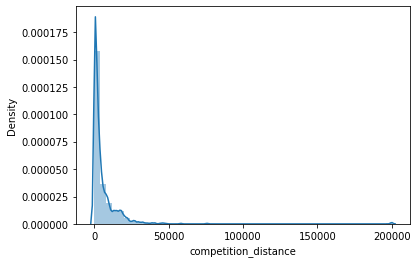

In [23]:

sns.distplot(df1_copy['competition_distance']);

# Categorical Attributes
### boxplot




In [24]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

In [25]:
%matplotlib notebook


filter_0 = df1_copy[(df1_copy.state_holiday != '0') & (df1_copy.sales > 0)]
plt.figure(figsize=[20,10])

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=filter_0)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=filter_0)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=filter_0)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='assortment', ylabel='sales'>

# 2.0 Passo 02 - Features Engineering



### Por que já estamos começando com abordagem nesse nível do projeto? 

#### _como derivar features?_

#### Mapa mental de hipóteses

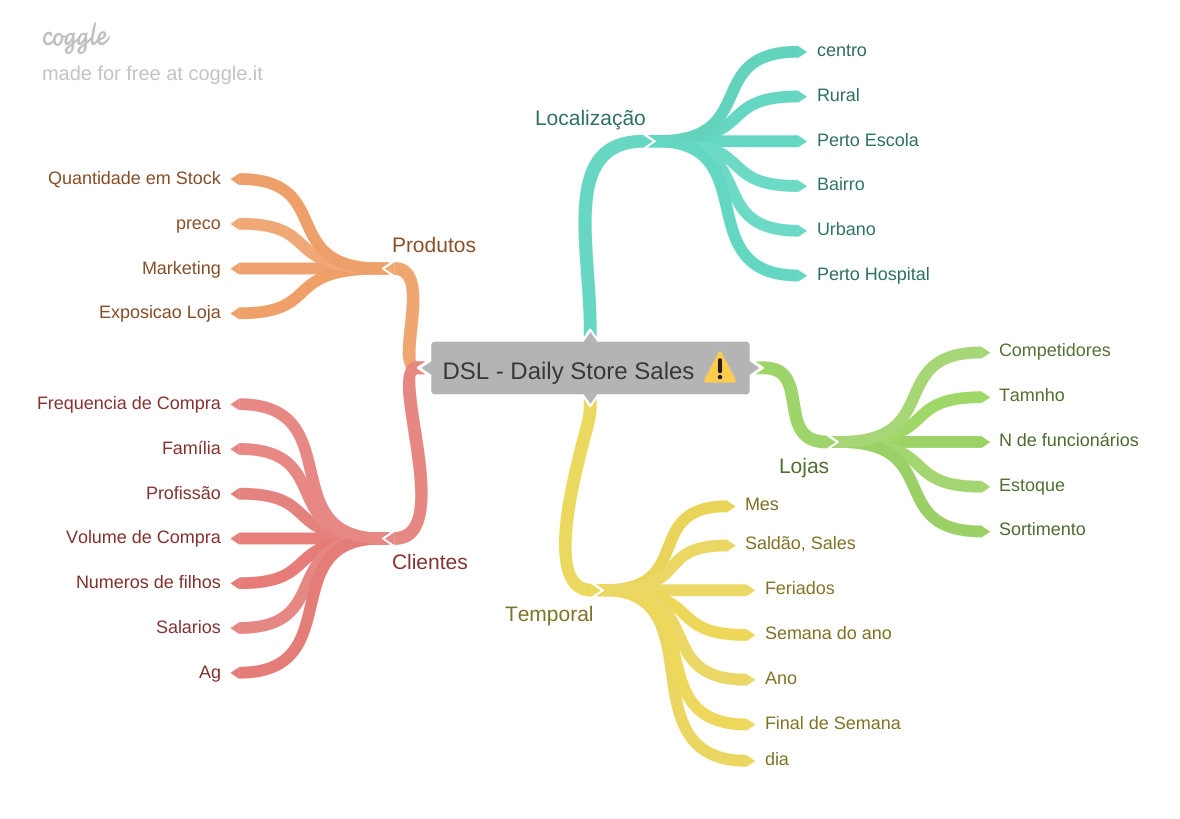

In [26]:
Image("/home/jan/ds_em_producao/img/DSL_-_Daily_Store_Sales_warning.png")

## CH - Criação das hipóteses

###  2.1.1 Hipoteses loja

**1** Lojas com número maior de fucionários deveriam vender mais

**2** Lojas com maior capacidade de estoque deveriam vender mais

**3** Lojas com maior porte deveriam vender mais

**4** Lojas com maior sortimento deveriam vender mais 

**5** Lojas com competidores mais proximos deveriam vender menos

**6** LOjas com competidores  mais tempo deveriam vender mais 

### 2.1.2 Hipoteses Produto

**1** Lojas que investem mais em Marketing deveriam vender mais

**2** Lojas com maior exposição do produto deveriam vender mais.

**3** Lojas com produtos com preço menor deveriam vender mais

**4** Lojas com promoções mais agressivas (Descontos maiores) deveriam vender mais

**5** Lojas com promoções ativas por mais tempo deveriam vender mais.

**6** Lojas com mais dias de promoção deveriam vender mais 

**7** Lojas com mais promoções consecutivas deveriam vender mais 


### 2.1.3 Hipoteses Tempo

**1** Lojas abertas durante o feriado de natl deveriam vender mais

**2** Lojas deveriam vender mais ao longo dos anos

**3** Lojas deveriam vender mais no segundo semestre do ano.

**4** Lojas deveriam vender mais depois do dia 10 de cada mês

**5** Lojas deveriam vender menos aos finais de semana

**6** Lojas deveriam vender menos durante os feriados escolares

### 2.1.4 Hipoteses finais 

#### loja
**1** Lojas com maior sortimento deveriam vender mais 

**2** Lojas com competidores mais proximos deveriam vender menos

**3** LOjas com competidores  mais tempo deveriam vender mais



#### produto
**4** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5** Lojas com mais dias de promoção deveriam vender mais 

**6** Lojas com mais promoções consecutivas deveriam vender mais 

#### tempo
**7** Lojas abertas durante o feriado de natl deveriam vender mais

**8** Lojas deveriam vender mais ao longo dos anos

**9** Lojas deveriam vender mais no segundo semestre do ano.

**10** Lojas deveriam vender mais depois do dia 10 de cada mês

**11** Lojas deveriam vender menos aos finais de semana

**12** Lojas deveriam vender menos durante os feriados escolares


*As hipóteses finais são aquelas que foram priorizadas de acordo com os dados que 
tenho disponivel no meu dataframe.*

### Derivando as variáveis que serão utilizadas EDA

In [27]:
df2 = df1_copy

In [28]:
df2

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,promo_interval,month_map,is_promo
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,31,2015,0,Jul,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",Jul,1
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",Jul,1
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,31,2015,0,Jul,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,31,2015,0,Jul,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6,2014,1,31,2013,"Jan,Apr,Jul,Oct",Jan,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4,2006,0,1,2013,0,Jan,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,1,2013,0,1,2013,0,Jan,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,1,2013,0,1,2013,0,Jan,0


In [29]:
import datetime

In [30]:
#year
df2['year'] = df2['date'].dt.year
#Month
df2['month'] = df2['date'].dt.month
#Day
df2['day'] = df2['date'].dt.day
#Week of Year
df2['week_of_year'] = df2['date'].dt.isocalendar().week
#Year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W')

#Competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], 
                                                                 month=x['competition_open_since_month'], 
                                                                 day=1), axis=1)

df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] ) /30 ).apply(lambda x: x.days).astype(int)

#promo since
df2['promo_since']     = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since']     = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta(days=7))
df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days).astype(int)


#assortment

df2 ['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended')
#state holiday 

df2 ['state_holiday'] = df2['state_holiday'].apply(lambda x: 'Public holiday' if x == 'a' else 'Easter holiday' if x == 'b' else 'Christmas' if x == 'c' else 'Regular day')


# 3 filtragem x seleção de variaveis, qual a diferença?


### filtrar variável



In [40]:
df3 = df2.copy()

In [45]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_year,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,Regular day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,Regular day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,Regular day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,Regular day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,Regular day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1 filtragem das linhas


In [46]:
#restrições
df3 = df3 [(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2 seleção de colunas

In [47]:
cols_drop = ['month_map','promo_interval', 'customers', 'open']
df3 = df3.drop(cols_drop, axis=1)

In [48]:
df3.columns


Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_year', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')